In [1]:
import numpy as np

input_data = np.load('initial_data/function_1/initial_inputs.npy')
print(input_data.shape)
print(input_data)


(10, 2)
[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]]


In [8]:
output_data = np.load('initial_data/function_1/initial_outputs.npy')
print(output_data.shape)
print(output_data)


(10,)
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]


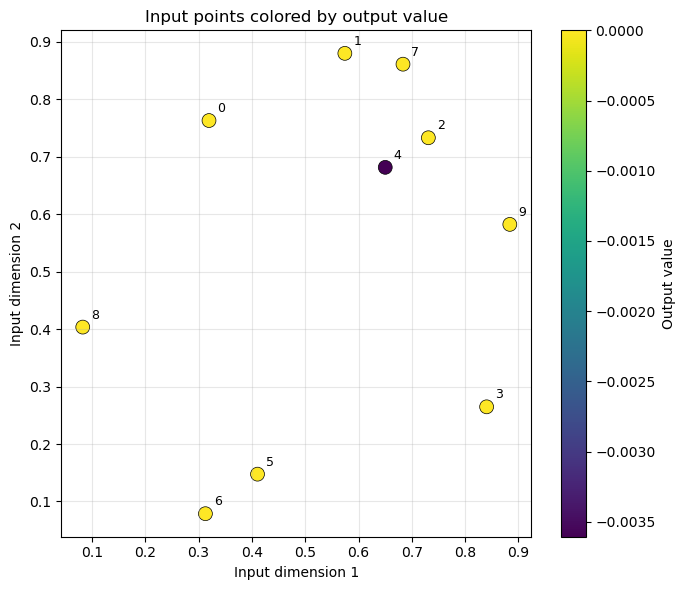

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
scatter = plt.scatter(input_data[:, 0], input_data[:, 1], 
                      c=output_data, cmap='viridis', 
                      s=100, edgecolors='black', linewidths=0.5)
plt.colorbar(scatter, label='Output value')

# Annotate each point with its index
for i, (x, y) in enumerate(input_data):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(6, 6), fontsize=9)

plt.xlabel('Input dimension 1')
plt.ylabel('Input dimension 2')
plt.title('Input points colored by output value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

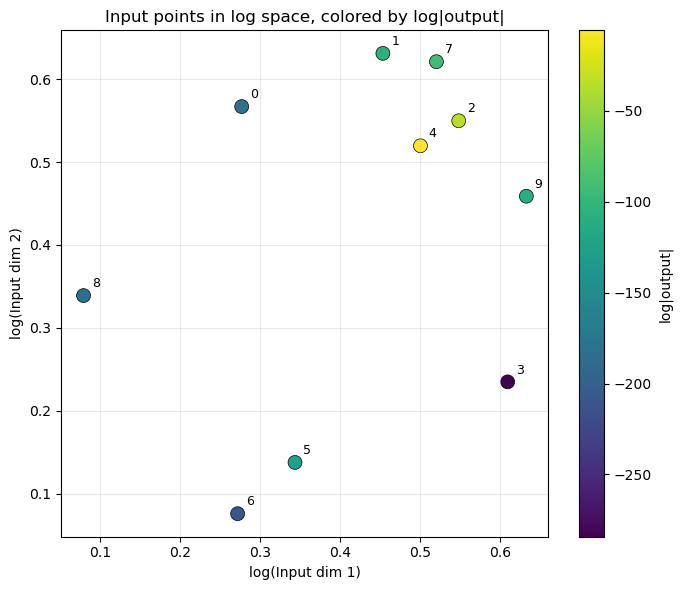

In [11]:
log_inputs = np.log1p(input_data)

plt.figure(figsize=(7, 6))
scatter = plt.scatter(log_inputs[:, 0], log_inputs[:, 1], 
                      c=np.log(np.abs(output_data)), cmap='viridis', 
                      s=100, edgecolors='black', linewidths=0.5)
plt.colorbar(scatter, label='log|output|')

for i, (x, y) in enumerate(log_inputs):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(6, 6), fontsize=9)

plt.xlabel('log(Input dim 1)')
plt.ylabel('log(Input dim 2)')
plt.title('Input points in log space, colored by log|output|')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

(10,)
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern


In [4]:
kernel = C(1.0) * Matern(length_scale=1.0, nu=2.5)

In [5]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gp.fit(input_data, output_data)


/Users/andriy/miniconda3/envs/appenv/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5),
                         n_restarts_optimizer=10, normalize_y=True)

In [ ]:
from scipy.stats import norm

def expected_improvement(X_candidates, gp, y_best, xi=0.01):
    mu, sigma = gp.predict(X_candidates, return_std=True)
    Z = (mu - y_best - xi) / (sigma + 1e-9)
    ei = (mu - y_best - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
    return ei
